In [1]:
from predictor_syn import *

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [3]:
predictor = MNISTTransform(args=None)
class_list = [0,1,2,3,4,5,6,7,8,9]  #for large number of class we need more complex model
X1,Y1 = predictor.generate_dataset(num_examples=6000,
                            class_list=class_list,
                            transformation="color",
                            transformation_param = "red",
)
# predictor.get_predictor(X1,Y1,class_list)

#Now getting the data from other domain
X2,Y2 = predictor.generate_dataset(num_examples=6000,
                            class_list=class_list,
                            transformation="color",
                            transformation_param = "green",
)
#Now training the debugger
predictor.remove_spurious_features_unsup(X1,Y1,X2,Y2,class_list,epochs=40)

Total Number of examples in dataset: 60000
Number of Example after Subset: (58862, 28, 28, 1)
Total Number of examples in dataset: 60000
Number of Example after Subset: (58862, 28, 28, 1)
#################################################
###########  Training the Debugger ##############
#################################################
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
___________________________________________________

230/230 [==============================] - 5s 20ms/step - en_de_mse: 0.0234 - pred_x: 1.2289 - causal_x: 0.2315 - spurious_x: 1.1641 - causal_acc: 0.9335 - spurious_acc: 0.7378
Epoch 20/40
230/230 [==============================] - 5s 20ms/step - en_de_mse: 0.0232 - pred_x: 1.2322 - causal_x: 0.2276 - spurious_x: 1.1105 - causal_acc: 0.9350 - spurious_acc: 0.7501
Epoch 21/40
230/230 [==============================] - 5s 20ms/step - en_de_mse: 0.0230 - pred_x: 1.0900 - causal_x: 0.2252 - spurious_x: 0.9897 - causal_acc: 0.9352 - spurious_acc: 0.7732
Epoch 22/40
230/230 [==============================] - 5s 20ms/step - en_de_mse: 0.0227 - pred_x: 0.9737 - causal_x: 0.2229 - spurious_x: 0.8070 - causal_acc: 0.9374 - spurious_acc: 0.7989
Epoch 23/40
230/230 [==============================] - 4s 19ms/step - en_de_mse: 0.0223 - pred_x: 1.0139 - causal_x: 0.2235 - spurious_x: 0.8172 - causal_acc: 0.9368 - spurious_acc: 0.7977
Epoch 24/40
230/230 [==============================] - 4s 19ms/step

## Full Decoding

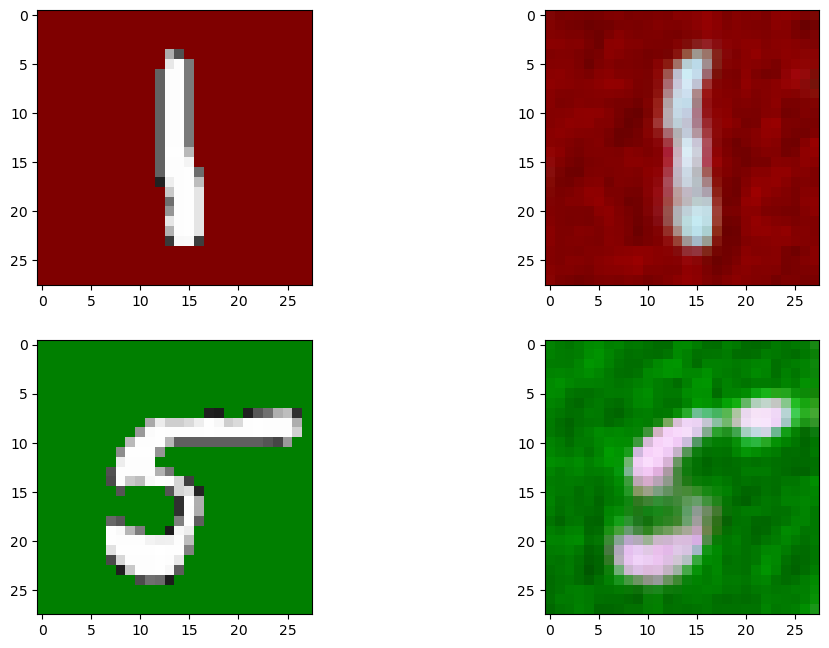

In [4]:
X = np.concatenate([X1,X2],axis=0)
rec_X1 = predictor.decoder(predictor.encoder(X)).numpy()
figure, axes = plt.subplots(2,2)

idx0 = 9423
axes[0,0].imshow(X[idx0,:,:,:],cmap="gray")
axes[0,1].imshow(rec_X1[idx0,:,:,:],cmap="gray")

idx1 = 89764
axes[1,0].imshow(X[idx1,:,:,:],cmap="gray")
axes[1,1].imshow(rec_X1[idx1,:,:,:],cmap="gray")

plt.show()

## Stable Decoding

In [5]:
def get_decoded_X(domain_X, domain_Y ,class_num):
    latent_space_dim = 7*7*2
    #Getting the encoded layer
    latent_X = predictor.encoder(domain_X).numpy()

    #Getting only causal latent representation
    only_causal_latent_X = latent_X.copy()
    only_causal_latent_X[:,latent_space_dim//2:] = 0

    #Getting only noise latent representation
    only_spurious_latent_X = latent_X.copy()
    only_spurious_latent_X[:,0:latent_space_dim//2] = 0 

    #Creading the causal feature for docding
    causal_X = predictor.decoder(only_causal_latent_X)
    spurious_X = predictor.decoder(only_spurious_latent_X)
    
    #Filtering for a particular class
    if class_num!=None:
        filter_arr = (domain_Y==class_num)
        
        domain_X = domain_X[filter_arr]
        causal_X = causal_X[filter_arr]
        spurious_X = spurious_X[filter_arr]
    
    return domain_X,causal_X,spurious_X

def plot_debugger_result(X1,Y1,X2,Y2,class_num):
    
    #Get the decoded data
    X1,causal_X1,spurious_X1 = get_decoded_X(X1,Y1,class_num)
    X2,causal_X2,spurious_X2 = get_decoded_X(X2,Y2,class_num)
    
    
    #Plotting the causal representation
    num_samples = 6
    figure, axes = plt.subplots(num_samples,6)

    imdxs = np.random.randint(0,causal_X1.shape[0],num_samples).tolist()
    for idx,imdx in enumerate(imdxs):
        axes[idx,0].imshow(X1[imdx,:,:,:],cmap="gray")
        axes[idx,1].imshow(causal_X1[imdx,:,:,:],cmap="gray")
        axes[idx,2].imshow(spurious_X1[imdx,:,:,:],cmap="gray")
        
        axes[idx,3].imshow(X2[imdx,:,:,:],cmap="gray")
        axes[idx,4].imshow(causal_X2[imdx,:,:,:],cmap="gray")
        axes[idx,5].imshow(spurious_X2[imdx,:,:,:],cmap="gray")
    plt.show()

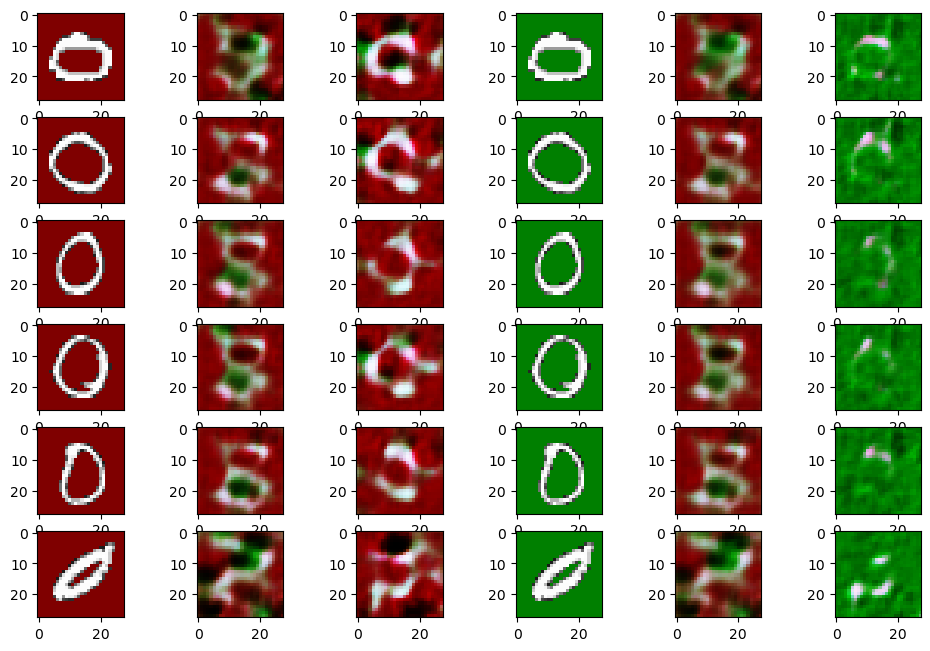

In [6]:
plot_debugger_result(X1,Y1,X2,Y2,0)

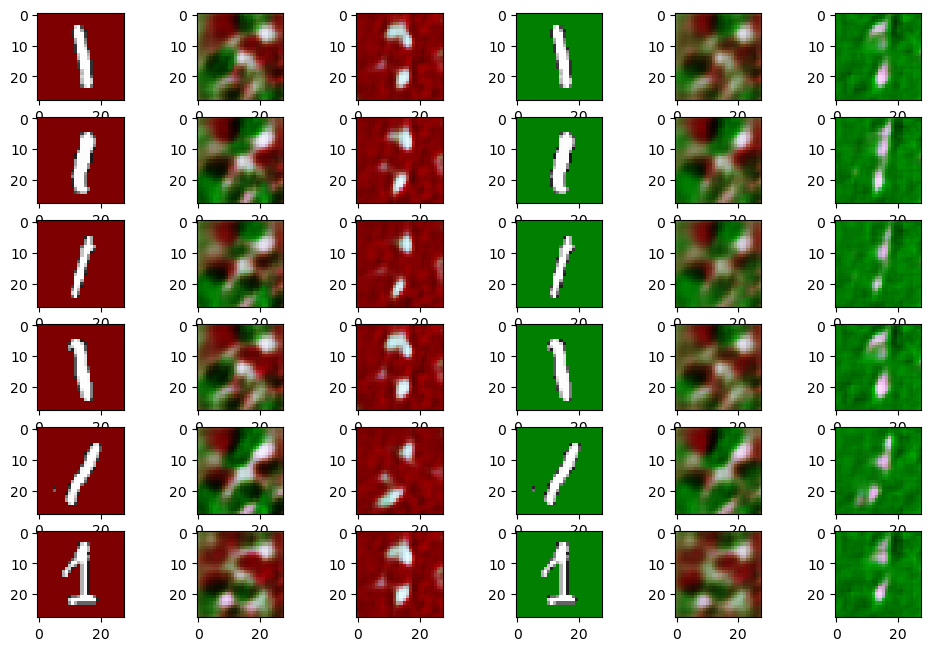

In [7]:
plot_debugger_result(X1,Y1,X2,Y2,1)

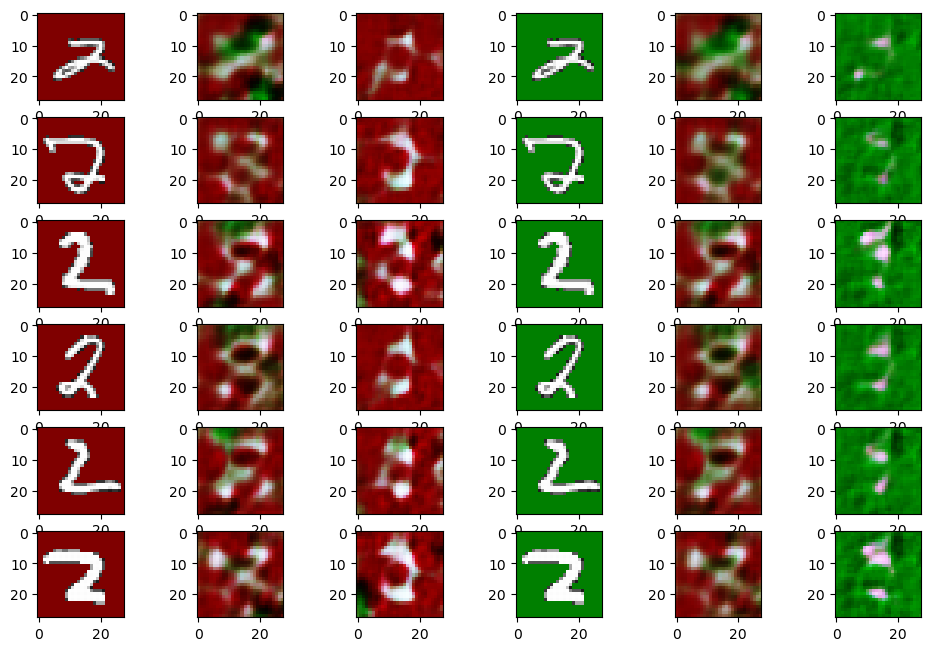

In [8]:
plot_debugger_result(X1,Y1,X2,Y2,2)

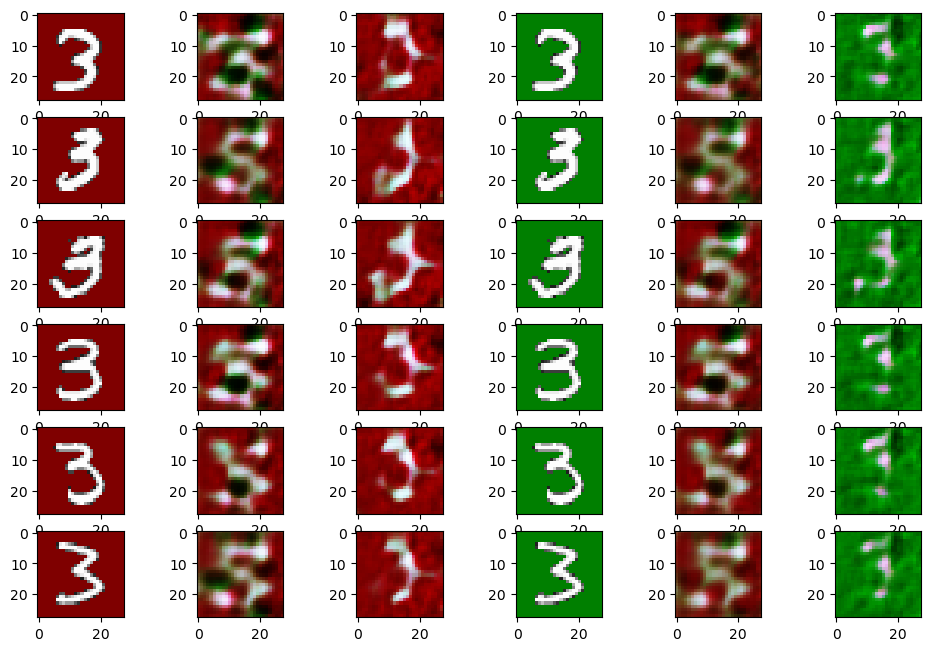

In [9]:
plot_debugger_result(X1,Y1,X2,Y2,3)

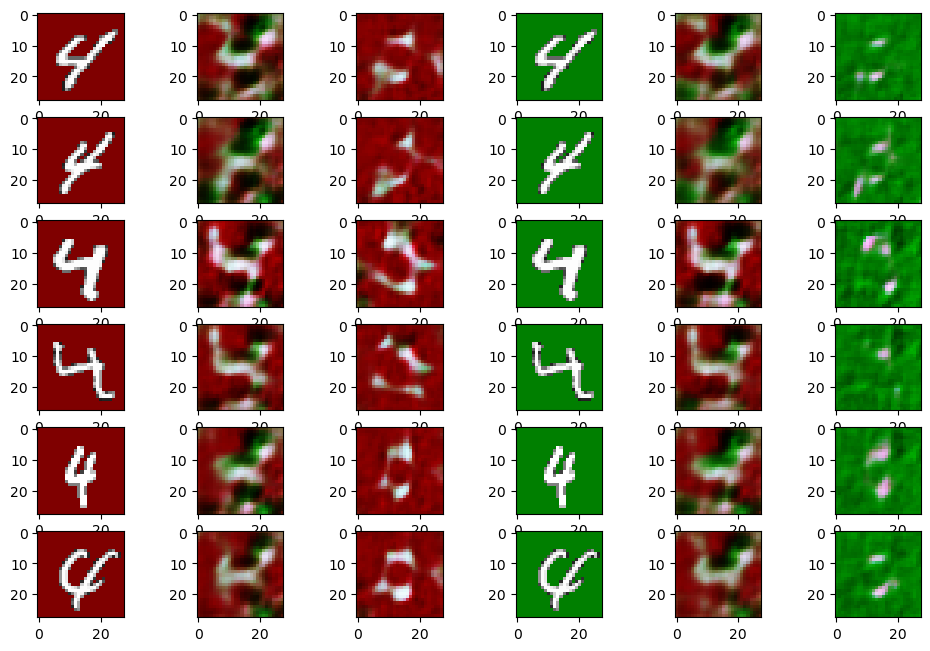

In [10]:
plot_debugger_result(X1,Y1,X2,Y2,4)

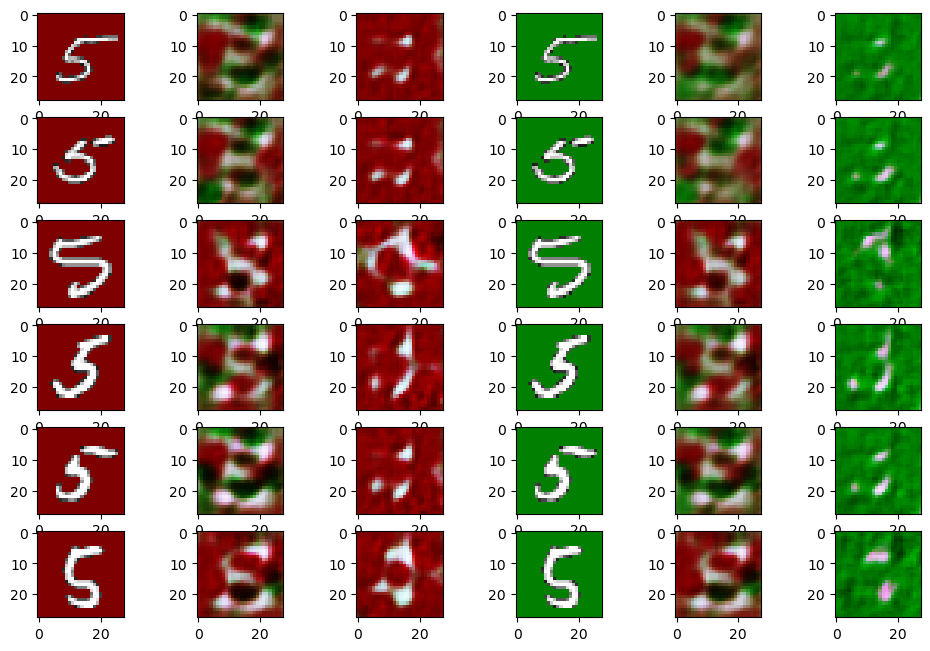

In [11]:
plot_debugger_result(X1,Y1,X2,Y2,5)

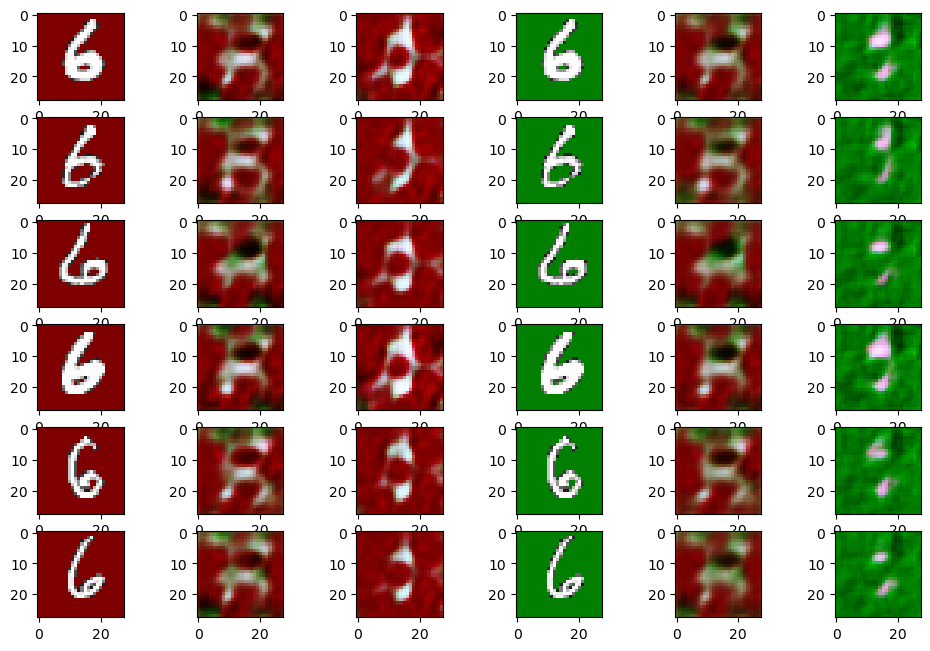

In [12]:
plot_debugger_result(X1,Y1,X2,Y2,6)

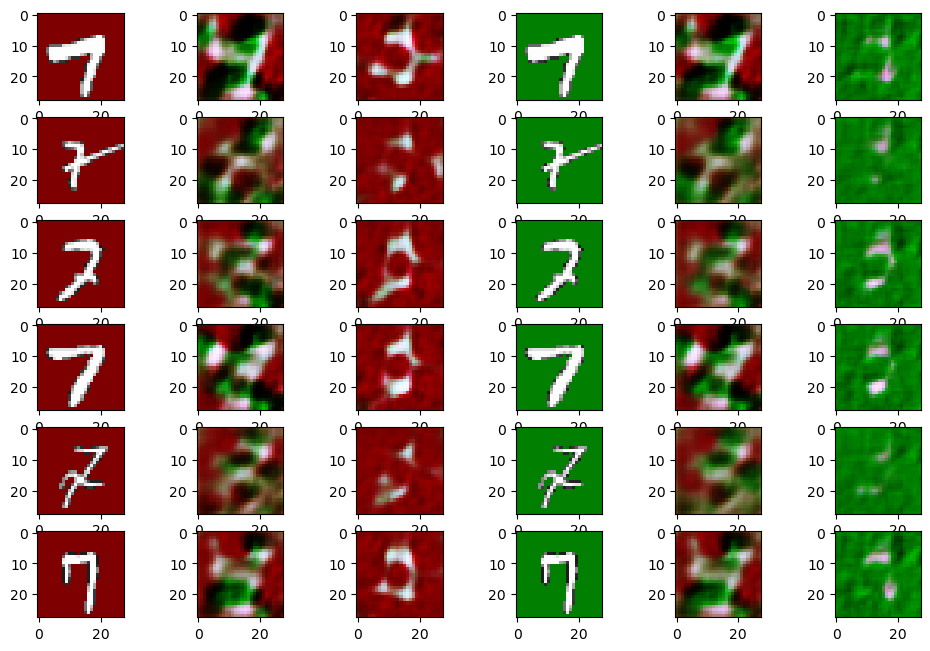

In [13]:
plot_debugger_result(X1,Y1,X2,Y2,7)

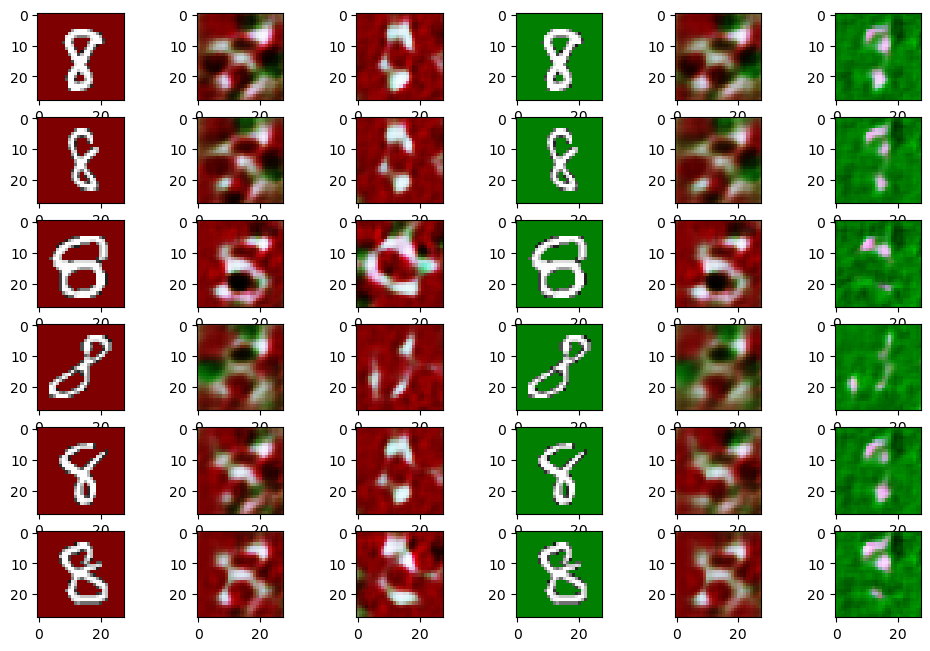

In [14]:
plot_debugger_result(X1,Y1,X2,Y2,8)

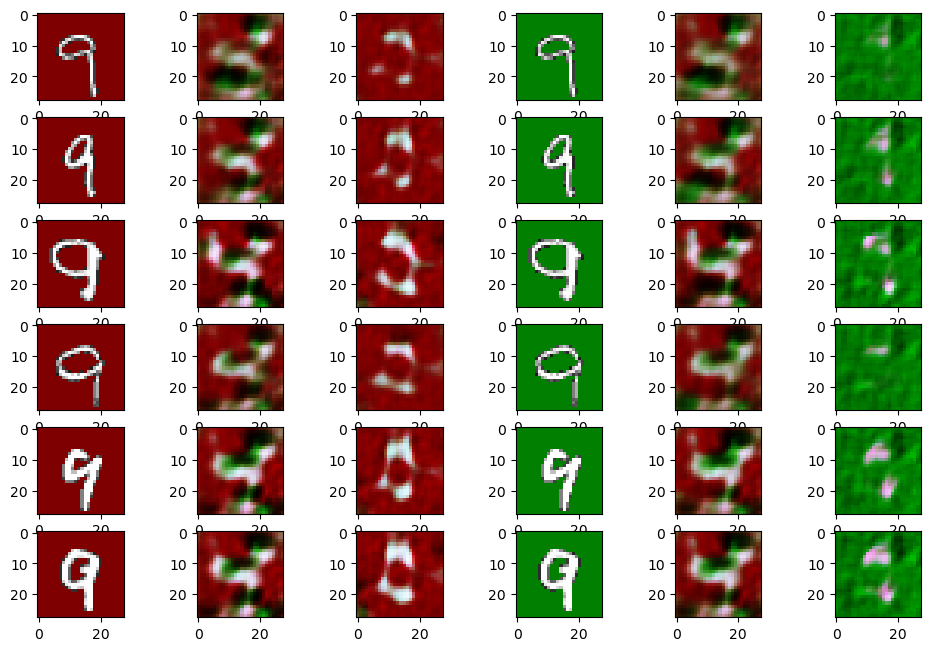

In [15]:
plot_debugger_result(X1,Y1,X2,Y2,9)